# 支持向量机简介

1. 支持向量：就是支持或支撑平面上把两类类别划分开来的超平面的向量点
2. 机：可以理解为一种算法
3. SVM是一种二分类模型
4. 线性可分支持向量机： 通过硬间隔最大化，学习一个线性分类器（图1）
5. 线性支持向量机：通过软间隔最大化，学习一个线性分类器（图2）
6. 非线性支持向量机： 通过核技巧，学习一个非线性的分类器（图3）
![](./img/6_1.png)

# 概念
## 几何间隔
$$
\begin{array}{l}
\gamma^{(i)}=y^{(i)} \frac{w \cdot x^{(i)}+b}{\|w\|} \\
\gamma=\min _{i=1, \ldots} r^{(i)}
\end{array}
$$
## 函数间隔
$$
\begin{array}{l}
\hat{\gamma}^{(i)}=y^{(i)}\left(w \cdot x^{(i)}+b\right) \\
\hat{\gamma}=\min _{i=1 \ldots m} \hat{r}^{(i)}
\end{array}
$$
## 目标函数$$
\begin{array}{l}
\gamma^{(i)}=\frac{\hat{\gamma}^{(i)}}{\|\hat{\gamma}\|} \\
\gamma=\frac{\hat{\gamma}}{\|w\|}
\end{array}
$$

![](./img/6_2.png)

## 最大间隔分类超平面
可表示为如下优化问题
$$
\begin{aligned}
&\max _{\text {w, } b} \gamma\\
&\text { st. } y^{(i)} \frac{w \cdot x^{(i)}+b}{\|w\|} \geq \gamma, \mathrm{i}=1,2, \ldots, \mathrm{m}
\end{aligned}
$$
考虑几何距离和函数距离， 上式等价于
$$
\begin{aligned}
&\max _{w, b} \frac{\hat{\gamma}}{\|\mathrm{w}\|}\\
&\text { s.t. } y^{(i)}\left(w \cdot x^{(i)}+b\right) \geq \hat{\gamma}, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}
\end{aligned}
$$
取${\hat{\gamma}}=1$转换为如下问题
$$
\begin{array}{l}
\min _{w, b} \frac{1}{2}\|\mathrm{w}\|^{2} \\
\text { s.t. } 1-y^{(i)}\left(w \cdot x^{(i)}+b\right) \leq 0, \mathrm{i}=1,2, \ldots, \mathrm{m}
\end{array}
$$


# 拉格朗日乘子法
## 等式约束
![](./img/6_3.png)
![](./img/6_4.png)

## 不等式约束
> 不等式约束需要是小于等于0的，如果不是需要转化

![](./img/6_5.png)
![](./img/6_6.png)
![](./img/6_7.png)

# SVM目标函数的优化

1. 目标函数
$$
\begin{aligned}
&\min _{w, b} \frac{1}{2}\|w\|^{2}\\
&\text { s.t. } 1-y^{(i)}\left(w \cdot x^{(i)}+b\right) \leq 0, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}
\end{aligned}
$$
2. 构造拉格朗日函数
$$
L(w, b, \alpha)=\frac{1}{2}\|w\|^{2}-\sum_{i=1}^{m} \alpha^{(i)} y^{(i)}\left(w \cdot x^{(i)}+b\right)+\sum_{i=1}^{m} \alpha^{(i)}
$$
3. 根据拉格朗日对偶性，原始问题的对偶问题是极大极小问题
    + 原问题
    $$
\min _{w, b} \max _{\alpha} L(w, b, \alpha)
$$
    + 对偶问题
    $$
\max _{\alpha} \min _{w, b} L(w, b, \alpha)
$$

# SVM目标函数求解
1. 求$\min _{w, b} L(w, b, \alpha)$
$$\begin{aligned}
&\nabla_{w} L(w, b, \alpha)=w-\sum_{i=1}^{m} \alpha^{(i)} y^{(i)} x^{(i)}=0 \quad \text { 可得 } \quad w=\sum_{i=1}^{m} \alpha^{(i)} y^{(i)} x^{(i)}\\
&\nabla_{b} L(w, b, \alpha)=\sum_{i=1}^{m} \alpha^{(i)} y^{(i)}=0 \quad \text { 可得 } \sum_{i=1}^{m} \alpha^{(i)} y^{(i)}=0\\
&\min _{w, b} L(w, b, \alpha)=\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{(j)}\left(x^{(i)} \cdot x^{(j)}\right)-\sum_{i=1}^{m} \alpha^{(i)} y^{(i)}\left(\left(\sum_{j=1}^{m} \alpha^{(j)} y^{(j)} x^{(j)}\right) \cdot x^{(i)}+b\right)+\sum_{i=1}^{m} \alpha^{(i)}\\
&=-\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{(j)}\left(x^{(i)} \cdot x^{(j)}\right)+\sum_{i=1}^{m} \alpha^{(i)}
\end{aligned}$$

2. 求$\min _{w, b} L(w, b, \alpha)$对$\alpha$极大
$$
\begin{array}{l}
\max _{\alpha}-\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{(j)}\left(x^{(i)} \cdot x^{(j)}\right)+\sum_{i=1}^{m} \alpha^{(i)} \\
\text { st. } \sum_{i=1}^{n} \alpha^{(i)} y^{(i)}=0 \quad \alpha^{(i)} \geq 0, \mathrm{i}=1,2, \ldots, \mathrm{m}
\end{array}
$$
等价于
$$
\rightarrow\left\{\begin{array}{l}
\min _{a} \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{j}\left(x^{(i)} \cdot x^{(j)}\right)-\sum_{i=1}^{m} \alpha^{(i)} \\
s . t . \sum_{i=1}^{m} \alpha^{(i)} y^{(i)}=0 \quad \alpha^{(i)} \geq 0, i=1,2, \ldots, \mathrm{m}
\end{array}\right.
$$
$$
\begin{array}{l}
w^{*}=\sum_{i=1}^{m} \alpha^{(i)^{*}} y^{(i)} x^{(i)} \\
y^{(j)}\left(w^{*} \cdot x^{(j)}+b^{*}\right)-1=0 \text { 得 } \\
b^{*}=y^{(j)}-\sum_{i=1}^{m} \alpha^{(i)^{*}} y^{(i)}\left(x^{(i)} \cdot x^{(j)}\right)
\end{array}
$$
此时分离超平面为：
$$
w^{*} \cdot x+b^{*}=0
$$
分类决策函数为：
$$
\begin{array}{l}
f(x)=\operatorname{sig} n\left(w^{*} \cdot x+b^{*}\right) \\
\text { 其中 } \operatorname{sign}(z)=\left\{\begin{array}{l}
1, z \geq 0 \\
-1, z<0
\end{array}\right.
\end{array}
$$

![](./img/6_8.png)

# SVM求解举例
![](./img/6_9.png)
![](./img/6_10.png)

In [1]:
from sklearn.svm import LinearSVC

In [16]:
X = np.array([[3, 3],
        [4, 3],
        [1, 1]])
y = np.array([1, 1, -1])
X
y

array([[3, 3],
       [4, 3],
       [1, 1]])

array([ 1,  1, -1])

In [5]:
lsvc = LinearSVC()
lsvc.fit(X, y)

LinearSVC()

In [6]:
lsvc.coef_
lsvc.intercept_
lsvc.classes_

array([[0.26463063, 0.25678255]])

array([-0.83268149])

array([-1,  1])

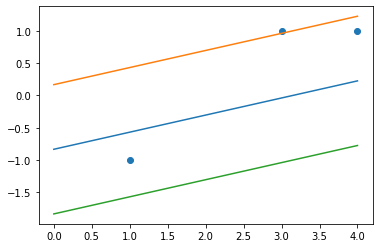

In [20]:
def y_t(x):
    return 0.2646 * x - 0.8327
plt.scatter(X[:, 0], y)
x = np.array([0, 4])
plt.plot(x, y_t(x))
plt.plot(x, y_t(x)+1)
plt.plot(x, y_t(x)-1)